<a href="https://colab.research.google.com/github/PaulToronto/Howard-University-Coursera-Linear-Algebra-For-Data-Science-Specialization/blob/main/2_4_2_Find_Eigenvalues_and_Eigenvectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.4.2 Find Eigenvalues and Eigenvectors

## Imports

In [1]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

## 2.4.2.1 Eigenvalues

This lesson covers:

- the definition of **eigenvalue** and **eigenvector**
- how to determine eigenvectors geometrically

### Eigenvector and Eigenvalue

Let $A$ be an $n \times n$ matrix.

- A non-zero vector $\vec{v}$ is called an **eigenvector** of $A$ if and only if there is a scalar $\lambda$ such that $A\vec{v} = \lambda\vec{v}$.
    - What this says is that the image of $\vec{v}$ is a scalar multiple of $\vec{v}$
- An **eigenvalue** is a scalar $\lambda$ such that $A\vec{v} = \lambda\vec{v}$, for some non-zero vector $\vec{v}$.

### Note

- If $A\vec{v} = \lambda\vec{v}$ for some $\vec{v} \ne \vec{0}$, then we say that $\vec{v}$ is an eigenvector corresponding to $\lambda$ (or an eigenvector for $\lambda$).
- The zero scalar can be an eigenvalue, but the zero vector cannot be an eigenvector.

### Example

Let $A = \begin{pmatrix}1 & 1\\-2 & 4\end{pmatrix}$, $\vec{v} = \begin{pmatrix}1 \\ 2\end{pmatrix}$, and $w = \begin{pmatrix}2 \\ 1\end{pmatrix}$.

If $\vec{v}$ or $\vec{w}$ an eigen vector of $A$? If so, find the eigenvalues.

In [2]:
A = sym.Matrix([[1, 1],
                [-2, 4]])
A

Matrix([
[ 1, 1],
[-2, 4]])

In [3]:
v = sym.Matrix([1, 2])
v

Matrix([
[1],
[2]])

In [4]:
w = sym.Matrix([2, 1])
w

Matrix([
[2],
[1]])

In [5]:
A @ v, 3 * v

(Matrix([
 [3],
 [6]]),
 Matrix([
 [3],
 [6]]))

In [6]:
A @ w

Matrix([
[3],
[0]])

$A\vec{v} = 3\vec{v}$

$\therefore$ $\vec{v}$ is an eigenvector of $A$ and the eigenvalue, $\lambda$ is equal to $3$.

There is no scalar $\lambda$ such that $A\vec{w} = \lambda\vec{w}$

$\therefore$ $\vec{w}$ is not an eigenvector of $A$.

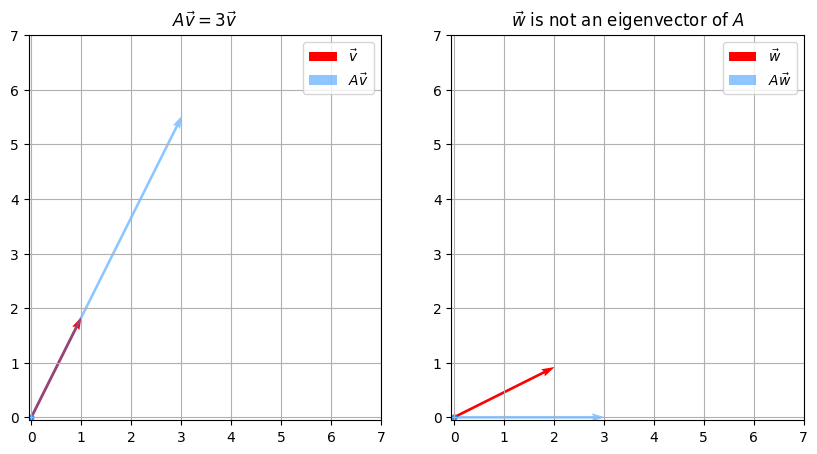

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
min = 0
max = 7

# plot v
v = np.array(v, dtype='int')
ax[0].quiver(0, 0, v[0], v[1], scale=max-min, color='red',
           label='$\\vec{v}$')
ax[0].scatter(0, 0, color='red', s=10)

# plot Av
av = A @ v
av = np.array(av, dtype='int')
ax[0].quiver(0, 0, av[0], av[1], scale=max-min, color='dodgerblue', alpha=0.5,
           label='$A\\vec{v}$')
ax[0].scatter(0, 0, color='dodgerblue', s=10)

ax[0].grid()
ax[0].set_xticks(np.arange(min, max+1))
ax[0].set_yticks(np.arange(min, max+1))
ax[0].set_title('$A\\vec{v} = 3\\vec{v}$')
ax[0].legend()

# plot w
w = np.array(w, dtype='int')
ax[1].quiver(0, 0, w[0], w[1], scale=max-min, color='red',
           label='$\\vec{w}$')
ax[1].scatter(0, 0, color='red', s=10)

# plot Aw
aw = A @ w
aw = np.array(aw, dtype='int')
ax[1].quiver(0, 0, aw[0], aw[1], scale=max-min, color='dodgerblue', alpha=0.5,
           label='$A\\vec{w}$')
ax[1].scatter(0, 0, color='dodgerblue', s=10)

ax[1].grid()
ax[1].set_xticks(np.arange(min, max+1))
ax[1].set_yticks(np.arange(min, max+1))
ax[1].set_title('$\\vec{w}$ is not an eigenvector of $A$')
ax[1].legend()

plt.show()

### Example

Consider the rotation transformation with $\theta = \frac{\pi}{2}$.

$$
\begin{align}
R\left(\frac{\pi}{2}\right) &= \begin{pmatrix}
\cos(\frac{\pi}{2}) & -sin(\frac{\pi}{2}) \\
\sin(\frac{\pi}{2}) & \cos(\frac{\pi}{2})
\end{pmatrix} \\
&= \begin{pmatrix}
0 & -1 \\
1 & 0
\end{pmatrix}
\end{align}
$$

Clearly, given any non-zero vector, $\vec{v}$, if its image is a rotation of $\frac{\pi}{2}$ they are not on the same line.

$\therefore$ the matrix, $R\left(\frac{\pi}{2}\right)$ has no eigenvectors.

### What about the matrix $R\left(\pi\right)$?

In this case, all non-zero vectors are eigenvectors of $R\left(\pi\right)$, where the corresponding eignvalue, $\lambda$ is equal to $-1$.

## 2.4.2.2 Finding Eigenvalues

### First a short review

Solving a system using the inverse:

$$
A \cdot X = C
$$

If $A$ is invertible, then:

$$
\begin{align}
A^{-1}AX &= A^{-1}C \\
IX &= A^{-1}C \\
X &= A^{-1}C
\end{align}
$$

Suppose C is a zero vector:

$$
\begin{align}
A \cdot X &= \begin{pmatrix}0 \\ 0\end{pmatrix} \\
X &= A^{-1} \begin{pmatrix}0 \\ 0\end{pmatrix}
\end{align}
$$

- Recall that a square matrix is invertible, if and only if it's determinant is not 0
- If the determinant is 0, the matrix is not invertible
- The equation $AX = \vec{0}$ can only have a non-trivial solution if
$A$ is not invertible, that is $\det(A) = 0$.

### Example

Let $A = \begin{pmatrix}1 & 1\\4 & 1\end{pmatrix}$.

Suppose we want to find all the eigenvalues of $A$. Here is a simple approach.

We want to find $\lambda$ so the the following equation has a non-trivial solution:

$$
\begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} \begin{pmatrix}x \\ y\end{pmatrix} = \lambda \begin{pmatrix}x \\ y\end{pmatrix}
$$

Solution:

$$
\begin{align}
\begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} \begin{pmatrix}x \\ y\end{pmatrix} &= \lambda \begin{pmatrix}x \\ y\end{pmatrix} \\
\begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} \begin{pmatrix}x \\ y\end{pmatrix} - \lambda \begin{pmatrix}x \\ y\end{pmatrix} &= \begin{pmatrix}0 \\ 0\end{pmatrix} \\
\left(\begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} - \lambda I \right)\begin{pmatrix}x \\ y\end{pmatrix} &= \begin{pmatrix}0 \\ 0\end{pmatrix}
\end{align}
$$

For this to have a non-trivial solution, the matrix

$$
\left(\begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} - \lambda I \right)
$$

cannot be invertible, it's determinant must be 0.

$$
\begin{align}
\left(\begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} - \lambda I \right)
&= \begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} - \lambda \begin{pmatrix}1 & 0\\0 & 1\end{pmatrix} \\
&= \begin{pmatrix}1 - \lambda & 1 \\ 4 && 1 - \lambda\end{pmatrix}
\end{align}
$$

Solve for $\lambda$ when the deterimant is 0.

$$
\det{\begin{pmatrix}1 - \lambda & 1\\4 && 1 - \lambda\end{pmatrix}} = 0
$$
<br/>
$$
\begin{align}
(1 - \lambda)(1 - \lambda) - 4 &= 0 \\
1 - 2\lambda + \lambda^{2} - 4 &= 0 \\
\lambda^{2} - 2\lambda - 3 &= 0 \\
(\lambda - 3)(\lambda + 1) &= 0
\end{align}
$$

<br>

$$
\therefore \lambda = 3 \text{ or } \lambda = -1
$$

### Characteristic Polynomial

Let $A$ be an $n \times n$ matrix.

The **characteristic polynomial** of $A$, sometimes denoted by $p_{A}$, is the polynomial given by:

$$
p_{A}(\lambda) = \det{(A - \lambda I)}
$$

where $I$ is the $n \times n$ identity matrix.

#### Note:

- If $A$ is an $n \times n$ matrix, then $p_{A}(\lambda) = \det{(A - \lambda I)}$ is a polynomial of degree $n$.
- The solutions to $\det{(A - \lambda I)} = 0$, are the eigenvalues of $A$.

### Example

Find the eignevalues of $A = \begin{pmatrix}3 & 2 & 4\\2 & 0 & 2\\4 & 2 & 3\end{pmatrix}$.

We first find the characteristic polynomial, $p$.

$p(\lambda) = \det{\begin{pmatrix}3 - \lambda & 2 & 4\\2 & -\lambda & 2\\4 & 2 & 3 - \lambda\end{pmatrix}}$

In [8]:
l = sym.symbols('\lambda')
l

\lambda

In [9]:
A = sym.Matrix([[3 - l, 2, 4],
                [2, -l, 2],
                [4, 2, 3 - l]])
A

Matrix([
[3 - \lambda,        2,           4],
[          2, -\lambda,           2],
[          4,        2, 3 - \lambda]])

In [10]:
A.det()

-\lambda**3 + 6*\lambda**2 + 15*\lambda + 8

In [11]:
A.det().factor()

-(\lambda - 8)*(\lambda + 1)**2

Set the determinant to 0 and solve for $\lambda$

In [12]:
sym.Eq(A.det().factor(), 0)

Eq(-(\lambda - 8)*(\lambda + 1)**2, 0)

In [13]:
sym.solve(sym.Eq(A.det(), 0))

[-1, 8]

In [14]:
sym.solve(A.det())

[-1, 8]

$\therefore \lambda = -1$ or $\lambda = 8$

This can also be done with `sympy`

https://docs.sympy.org/latest/tutorials/intro-tutorial/matrices.html

In [15]:
A = sym.Matrix([[3, 2, 4],
                [2, 0, 2],
                [4, 2, 3]])
A

Matrix([
[3, 2, 4],
[2, 0, 2],
[4, 2, 3]])

In [16]:
A.eigenvals()

{8: 1, -1: 2}

`eigenvals()` returns a dictionary of `eigenvalue: algebraic_multiplicity` pairs

## 2.4.2.3 Eigenspace

This lesson covers:

- What an eigenspace is
- Given any eigenvalue $\lambda$, how to find the eigenspace of a matrix that corresponds to $\lambda$.

### Eigenspace

Let $A$ be an $n \times n$ matrix and $\lambda$ an eigenvalue of $A$.

The set of all vectors $\vec{v}$ such that $A\vec{v} = \lambda\vec{v}$ is called an **eigenspace** and is denoted by $E_{\lambda}$.

#### Note

$E_{\lambda}$ contains all the eigenvectors of $A$ that correspond to $\lambda$ and the zero vector.

#### Discussion

Let $A$ be an $n \times n$ matrix and let $\lambda$ be an eigenvalue of $A$.

We want to find all vectors $\vec{v}$ such that

$$
A\vec{v} = \lambda\vec{v}
$$

Thus,

$$
\begin{align}
A\vec{v} &= \lambda\vec{v} \\
A\vec{v} - \lambda\vec{v} &= \vec{0} \\
(A - \lambda I_n)\vec{v} &= \vec{0}
\end{align}
$$

#### Example

Find the eigenspace of $A = \begin{pmatrix}1 & 1\\4 & 1\end{pmatrix}$ for the eigenvalue $3$.

##### Solution:

We must solve the following for $\begin{pmatrix}x\\y\end{pmatrix}$.

$$
\begin{align}
\left(\begin{pmatrix}1 & 1\\4 & 1\end{pmatrix} - 3I_{2}\right)\begin{pmatrix}x \\y\end{pmatrix} &= \begin{pmatrix}0\\0\end{pmatrix} \\
\begin{pmatrix}-2 & 1\\4 & -2\end{pmatrix}\begin{pmatrix}x\\y\end{pmatrix} &= \begin{pmatrix}0\\0\end{pmatrix} \\
\begin{pmatrix}-2x + y\\4x - 2y\end{pmatrix} &= \begin{pmatrix}0\\0\end{pmatrix}
\end{align}
$$

We now have a sytem of linear equations which can be written as an augmented matrix:

In [17]:
M = sym.Matrix([[-2, 1, 0],
                [4, -2, 0]])

M

Matrix([
[-2,  1, 0],
[ 4, -2, 0]])

$R_2 \leftarrow R_2 + 2R_1$

In [18]:
M[1,:] = M.row(1) + 2 * M.row(0)
M

Matrix([
[-2, 1, 0],
[ 0, 0, 0]])

$R_1 \leftarrow = -\frac{1}{2}R_1$

In [19]:
M[0,:] = - sym.Rational(1, 2) * M.row(0)
M

Matrix([
[1, -1/2, 0],
[0,    0, 0]])

In [20]:
# alternately
M = sym.Matrix([[-2, 1, 0],
                [4, -2, 0]])

M.rref(pivots=False)

Matrix([
[1, -1/2, 0],
[0,    0, 0]])

From that we can see that $y = 2x$

Hence, and eigenvector that corrresponds to the eigenvalue $3$ is of the form

$$
\begin{pmatrix}t \\ 2t\end{pmatrix} = t\begin{pmatrix}1\\2\end{pmatrix}
$$

where $x \in \mathbb{R} - \{0\}$.

Thus, the **eigenspace** that corresponds to 3 is

$$
E_{3} = \left\{t\begin{pmatrix}1\\2\end{pmatrix} : t \in \mathbb{R}\right\}
$$

- Note, that the graph of the eigenspace in this example is a line that passes through the origin.
- The eigenspace is simply all eigenvectors that correspond to a given eigenvalue plus the zero vector
- The zero vector is in the eigenspace, but it is not an eigenvector

#### Using `sympy`

In [21]:
A = sym.Matrix([[1, 1],
                [4, 1]])
A

Matrix([
[1, 1],
[4, 1]])

In [22]:
A.eigenvals()

{3: 1, -1: 1}

In [23]:
A.eigenvects()

[(-1,
  1,
  [Matrix([
   [-1/2],
   [   1]])]),
 (3,
  1,
  [Matrix([
   [1/2],
   [  1]])])]

- `eigenvects` returns a list of tuples of the form: `(eigenvalue, algebraic_multiplicity, [eigenvectors])`

In [24]:
len(A.eigenvects())

2

In [25]:
# the eigenvector corresponding to eigenvalue 3
A.eigenvects()[1][2][0]

Matrix([
[1/2],
[  1]])

## 2.4.2.4 Diagonalizable Matrices

This lesson covers:

- What is a diagonalizable matrix?
- What does it mean for a matrix to be diagonalizable?

### Definition: Diagonal Matrix

Let $A$ be an $n \times n$ matrix. Then $A$ is a **diagonal matrix** if and only if the only nonzero entries are on the main diagonal.

#### Note:

This definition does not specify that there can't be $0$s on the main diagonal, only that there are no nonzeros that are not on the main diagonal.

### Discussion

- The determinnt of a diagonal matrix is the product of the entries on the main diagonal
- If all the entries on the main diagonal are equal, then the matrix is called a **scalar matrix**

In [26]:
a, b, c, x, y, z = sym.symbols('a b c x y z')

A = sym.Matrix([[a, 0, 0],
                [0, b, 0],
                [0, 0, c]])

# The determinnt of a diagonal matrix is the
# product of the entries on the main diagonal
A.det()

a*b*c

In [27]:
B = sym.Matrix([[a, 0, 0],
                [0, a, 0],
                [0, 0, a]])
X = sym.Matrix([x, y, z])

B @ X # B is a scalar matrix

Matrix([
[a*x],
[a*y],
[a*z]])

### Powers of Diagonal Matrics

Let $D = \begin{pmatrix}a & 0 & 0\\0 & b & 0\\0 & 0 & c\end{pmatrix}$ and let $n$ be any positive integer.

Then

$$
D^{n} = \begin{pmatrix}a^n & 0 & 0\\0 & b^n & 0\\0 & 0 & c^n\end{pmatrix}
$$.

In [28]:
a, b, c  = sym.symbols('a b c')

D = sym.Matrix([[a, 0, 0],
                [0, b, 0],
                [0, 0, c]])
D

Matrix([
[a, 0, 0],
[0, b, 0],
[0, 0, c]])

In [29]:
D @ D @ D

Matrix([
[a**3,    0,    0],
[   0, b**3,    0],
[   0,    0, c**3]])

In [30]:
D**3

Matrix([
[a**3,    0,    0],
[   0, b**3,    0],
[   0,    0, c**3]])

In [31]:
n = sym.symbols('n')

D**n

Matrix([
[a**n,    0,    0],
[   0, b**n,    0],
[   0,    0, c**n]])

In [32]:
a, b, c, d = sym.symbols('a b c d')

D1 = sym.Matrix([[a, b],
                 [c, d]])

# just to show that raising a sympy matrix
# to a power is not an element-wise operation
D1**3

Matrix([
[          a**3 + 2*a*b*c + b*c*d, a**2*b + a*b*d + b**2*c + b*d**2],
[a**2*c + a*c*d + b*c**2 + c*d**2,           a*b*c + 2*b*c*d + d**3]])

### Definition: Diagonalizable

Let $A$ be an $n \times n$ matrix. Then a is **diagonalizable** if an only if there exists an invertible $n \times n$ matrix $C$ and a diagonal matrix $D$, such that

$$
A = CDC^{-1}
$$

#### All diagonal matrices are diagonalizable

$$
C = I
$$

If $D$ is a diagonal matrix, then $D = IDI^{-1}$, where $I$ is the identity matrix that is the same size as $D$.

### When is a matrix diagonalizable?


#### Linear Independence

A set of vectors $\{\vec{v_1}, \vec{v_2}, \dots, \vec{v_k}\}$ is said to be **linearly independent** in $\mathbb{R}^{n}$ if and only if no vector in the set can be written as a linear combination of the remaining vectors.

The following sets are linearly independent.

1. $\left\{
    \begin{pmatrix}1\\0\\0\end{pmatrix},
    \begin{pmatrix}0\\1\\0\end{pmatrix},
    \begin{pmatrix}0\\0\\1\end{pmatrix}
\right\}$ in $\mathbb{R}^{3}$
<br/><br/>
2. $\left\{
    \begin{pmatrix}1\\0\end{pmatrix},
    \begin{pmatrix}1\\1\end{pmatrix}
\right\}$ in $\mathbb{R}^{2}$

#### Diagonalization Theorem

An $n \times n$ matrix $A$ is diagonalizable if and only if $A$ has $n$ linearly independent eigenvectors.

#### Let $A$ be an $n \times n$ matrix

1. If $A$ has $n$ distinct eigenvalues, then $A$ is diagonalizable.
2. If $E_{\lambda}$ and $E_{\lambda}$ are two distinct eigenspaces, $\vec{v} \in E_{\lambda} - \{\vec{0}\}$ and $\vec{u} \in E_{\mu} - \{\vec{0}\}$, then $\{\vec{v}, \vec{u}\}$ is linearly independent.

#### Structure of $D$ and $C$

Let $A$ be a $3 \times 3$ matrix. Let $\vec{v_1}$, $\vec{v_2}$ and $\vec{v_3}$ be eigenvectors with corresponding eigenvalues $\lambda_{1}$, $\lambda_{2}$ and $\lambda_{3}$ respectively.

If $\{\vec{v_1}, \vec{v_2}, \vec{v_3}\}$ is linearly independent, then we can write $C$ and $D$ as follows:

$$
C = \begin{pmatrix}\vec{v_1} & \vec{v_2} & \vec{v_3}\end{pmatrix}
$$

$$
D = \begin{pmatrix}
\lambda_1 & 0 & 0 \\
0 & \lambda_2 & 0 \\
0 & 0 & \lambda_3
\end{pmatrix}
$$

The eigenvectors are the columns of $C$ and their order can be switched as long as the order of the eigenvalues are switched accordingly in $D$.

#### Conclusion:

Suppose we have $A = CDC^{-1}$, where $D$ is a diagonal matrix.

- $D$ is not unique
- The entries on the main diagonal of $D$ are the eigenvalues of $A$
- The columns of $C$ are eigenvectors of $A$

### Example

Let $A = \begin{pmatrix}
3 & 2 & 4\\
2 & 0 & 2\\
4 & 2 & 3
\end{pmatrix}$

Find the characteristic polymomial, $p_A\left(\lambda\right)$:

$$
\begin{align}
p_A\left(\lambda\right) &= \det{(A - \lambda I)} \\
&= \det{
\begin{pmatrix}
3 - \lambda & 2 & 4\\
2 & -\lambda & 2 \\
4 & 2 & 3 - \lambda
\end{pmatrix}} \\
&= -\lambda^{3} + 6\lambda^{2} + 15\lambda + 8
\end{align}
$$

In [33]:
# verify with sympy
l = sym.symbols('\lambda')

P_A = sym.Matrix([[3 - l, 2, 4],
                  [2, -l, 2],
                  [4, 2, 3 - l]])
P_A.det()

-\lambda**3 + 6*\lambda**2 + 15*\lambda + 8

In [34]:
P_A.det().factor()

-(\lambda - 8)*(\lambda + 1)**2

Let $p_{A} = 0$ and solve for $\lambda$ to find the eigenvalues

In [35]:
sym.solve(P_A.det())

[-1, 8]

In [36]:
# verify with sympy
A = sym.Matrix([[3, 2, 4],
                [2, 0, 2],
                [4, 2, 3]])
A.eigenvals()

{8: 1, -1: 2}

To find the eigenvectors we have to solve for $\vec{v}$:

$$
(A - I\lambda)\vec{v} = \vec{0}
$$

Let $v_1$, $v_2$ and $v_3$ be the components of $\vec{v}$.

Find $E_8$:

Let $\lambda = 8$

In [37]:
A

Matrix([
[3, 2, 4],
[2, 0, 2],
[4, 2, 3]])

In [38]:
# the augmented matrix of the sytem when lambda = 8
Am = (A - sym.eye(3) * 8).col_insert(3, sym.Matrix([0, 0, 0]))
Am

Matrix([
[-5,  2,  4, 0],
[ 2, -8,  2, 0],
[ 4,  2, -5, 0]])

In [39]:
Am.rref(pivots=False)

Matrix([
[1, 0,   -1, 0],
[0, 1, -1/2, 0],
[0, 0,    0, 0]])

$$
\begin{align}
v_1 &= v_3 \\
v_2 &= \frac{1}{2}v_3
\end{align}
$$

Let $v_3 = t$

$$
\begin{align}
v_1 &= t \\
v_2 &= \frac{1}{2}t \\
v_3 &= t
\end{align}
$$

<br>

$$
E_8 = \left\{t\begin{pmatrix}1 \\ \frac{1}{2} \\ 1\end{pmatrix} : t \in \mathbb{R}\right\}
$$

Find $E_{-1}$

Let $\lambda = -1$

In [40]:
A

Matrix([
[3, 2, 4],
[2, 0, 2],
[4, 2, 3]])

In [41]:
Am = (A - sym.eye(3) * (-1)).col_insert(3, sym.Matrix([0, 0, 0]))
Am

Matrix([
[4, 2, 4, 0],
[2, 1, 2, 0],
[4, 2, 4, 0]])

In [42]:
Am.rref(pivots=False)

Matrix([
[1, 1/2, 1, 0],
[0,   0, 0, 0],
[0,   0, 0, 0]])

$$
v_1 + \frac{1}{2}v_2 + v_3 = 0
$$

Let $v_2 = s$ and let $v_3 = t$

$$
\begin{align}
v_1 &= -\frac{1}{2}s - t \\
v_2 &= s \\
v_3 &= t
\end{align}
$$

<br>

$$
E_{-1} = \left\{
s\begin{pmatrix}\frac{-1}{2} \\ 1 \\ 0\end{pmatrix} +
t\begin{pmatrix}-1 \\ 0 \\ 1\end{pmatrix} : s, t \in \mathbb{R}     
\right\}
$$

In [43]:
A.eigenvals()

{8: 1, -1: 2}

In [44]:
A.eigenvects()

[(-1,
  2,
  [Matrix([
   [-1/2],
   [   1],
   [   0]]),
   Matrix([
   [-1],
   [ 0],
   [ 1]])]),
 (8,
  1,
  [Matrix([
   [  1],
   [1/2],
   [  1]])])]

Pick one vector from $E_8$ since the algebraic multiplicity is 1.

In [45]:
v_1 = sym.Matrix([2, 1, 2])
v_1

Matrix([
[2],
[1],
[2]])

Pick two vectors from $E_{=1}$ since the algebraic multiplicity is 2.

In [46]:
v_2 = sym.Matrix([-1, 0, 1])
v_2

Matrix([
[-1],
[ 0],
[ 1]])

In [47]:
v_3 = sym.Matrix([-1, 2, 0])
v_3

Matrix([
[-1],
[ 2],
[ 0]])

In [48]:
C = sym.Matrix(sym.BlockMatrix([v_2, v_3, v_1]))
C

Matrix([
[-1, -1, 2],
[ 0,  2, 1],
[ 1,  0, 2]])

In [49]:
D = sym.diag(-1, -1, 8)
D

Matrix([
[-1,  0, 0],
[ 0, -1, 0],
[ 0,  0, 8]])

Verify that $A = CDC^{-1}$

In [50]:
A

Matrix([
[3, 2, 4],
[2, 0, 2],
[4, 2, 3]])

In [51]:
C @ D @ C.inv()

Matrix([
[3, 2, 4],
[2, 0, 2],
[4, 2, 3]])

## 2.4.2.5 Diagonalization of a Matrix Using Python

In [52]:
M = sym.Matrix([[1, -2, 4, -2],
                [5, 3, -3, -2],
                [5, -2, 2, -2],
                [5, -2, -3, 3]])
M

Matrix([
[1, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [53]:
C, D = M.diagonalize()

In [54]:
C

Matrix([
[0, 3, 7,  0],
[1, 5, 4, -1],
[1, 5, 9,  0],
[1, 5, 0,  1]])

In [55]:
D

Matrix([
[-2, 0, 0, 0],
[ 0, 1, 0, 0],
[ 0, 0, 5, 0],
[ 0, 0, 0, 5]])

In [56]:
C @ D @ C.inv()

Matrix([
[1, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

## 2.4.2.6 Practice Quiz